# 用亂數來製造行情資料



In [4]:
import random 
import numpy as np
import pandas as pd
import peforth
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


c:\users\hcche\appdata\local\programs\python\python36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
%f __main__ :> random dir . cr

In [ ]:
# 0~1 之間
help(random.random)

In [ ]:
# a~b 之間
help(random.uniform)

In [ ]:
curve = [min(max(-7,int(random.uniform(-7,7)*100+50)/100),7) for i in range(100)]
    

# try demo of mpl_finance
    c:\Users\hcche\Documents\GitHub\mpl_finance\examples\plot_day_summary_oclh_demo.py 

In [ ]:
"""
Show how to use plot_day_summary_oclh function
"""
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import (MONDAY, DateFormatter, MonthLocator,
                              WeekdayLocator, date2num)

from mpl_finance import plot_day_summary_oclh

date1 = "2003-11-1"
date2 = "2003-12-1"

# every monday
mondays = WeekdayLocator(MONDAY)
daysFmt = DateFormatter("%d %b %y")


quotes = pd.read_csv(r'c:\Users\hcche\Documents\GitHub\mpl_finance\examples\data\yahoofinance-INTC-19950101-20040412.csv',
                     index_col=0,
                     parse_dates=True,
                     infer_datetime_format=True)

# select desired range of dates
quotes = quotes[(quotes.index >= date1) & (quotes.index <= date2)]


fig, ax = plt.subplots()
plot_day_summary_oclh(ax, zip(date2num(quotes.index.to_pydatetime()),
                              quotes['Open'], quotes['Close'],
                              quotes['Low'], quotes['High']),
                      ticksize=3)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(daysFmt)
ax.autoscale_view()
ax.xaxis.grid(True, 'major')
ax.grid(True)

fig.autofmt_xdate()

plt.show()

In [ ]:
quotes

In [ ]:
import peforth

In [ ]:
for q in quotes:
    a,b,c,d = q[:5]
    peforth.ok(loc=locals())
    

# 使用matplotlib轻松绘制股票K线图

    https://zhuanlan.zhihu.com/p/24282861

In [11]:
%pdb off
from mpl_finance import candlestick_ohlc
import datetime
import matplotlib.dates as mdates


# 设置历史数据区间
date1 = (2003,11,3) # 起始日期，格式：(年，月，日)元组
date2 = (2003,11,10)  # 结束日期，格式：(年，月，日)元组
# 从雅虎财经中获取股票代码601558的历史行情
# (用上面的) quotes = mpf.quotes_historical_yahoo_ohlc('601558.ss', date1, date2)

quotes = pd.read_csv(r'c:\Users\hcche\Documents\GitHub\mpl_finance\examples\data\yahoofinance-INTC-19950101-20040412.csv',
                     # index_col=0,
                     header=0,
                     names=['date','open','high','low','close','adj close','volume'],
                     parse_dates=True,
                     infer_datetime_format=True)
# select desired range of dates
quotes = quotes[(quotes.date >= date1) & (quotes.date <= date2)]


Automatic pdb calling has been turned OFF


TypeError: '>=' not supported between instances of 'str' and 'tuple'

In [6]:
quotes

,date,open,high,low,close,adj close,volume
0,1995-01-03,3.976563,4.000975,3.937500,3.984375,2.669861,41721600
1,1995-01-04,4.000000,4.023438,3.953125,3.976563,2.664625,41865600
2,1995-01-05,3.984375,4.062500,3.976563,4.007813,2.685566,60480000
3,1995-01-06,4.007813,4.070313,4.000000,4.062500,2.722212,56316800
4,1995-01-09,4.054688,4.125000,4.054688,4.125000,2.764089,75056000
5,1995-01-10,4.148438,4.210938,4.125000,4.164063,2.790266,109320000
6,1995-01-11,4.179688,4.210938,4.125000,4.140625,2.774560,58468800
7,1995-01-12,4.132813,4.226563,4.097656,4.195313,2.811206,85384000
8,1995-01-13,4.226563,4.281250,4.218750,4.257813,2.853087,126689600
9,1995-01-16,4.281250,4.281250,4.234375,4.257813,2.853087,59564800


In [7]:
quotes.date

0       1995-01-03
1       1995-01-04
2       1995-01-05
3       1995-01-06
4       1995-01-09
5       1995-01-10
6       1995-01-11
7       1995-01-12
8       1995-01-13
9       1995-01-16
10      1995-01-17
11      1995-01-18
12      1995-01-19
13      1995-01-20
14      1995-01-23
15      1995-01-24
16      1995-01-25
17      1995-01-26
18      1995-01-27
19      1995-01-30
20      1995-01-31
21      1995-02-01
22      1995-02-02
23      1995-02-03
24      1995-02-06
25      1995-02-07
26      1995-02-08
27      1995-02-09
28      1995-02-10
29      1995-02-13
           ...    
2305    2004-02-27
2306    2004-03-01
2307    2004-03-02
2308    2004-03-03
2309    2004-03-04
2310    2004-03-05
2311    2004-03-08
2312    2004-03-09
2313    2004-03-10
2314    2004-03-11
2315    2004-03-12
2316    2004-03-15
2317    2004-03-16
2318    2004-03-17
2319    2004-03-18
2320    2004-03-19
2321    2004-03-22
2322    2004-03-23
2323    2004-03-24
2324    2004-03-25
2325    2004-03-26
2326    2004

In [12]:
quotes.date[0]

'1995-01-03'

In [14]:
quotes.date[0].to_pydatetime()

AttributeError: 'str' object has no attribute 'to_pydatetime'

In [18]:
tuple('1995-01-03'.split('-'))

('1995', '01', '03')

In [13]:
quotes.date = mdates.date2num(quotes.date.to_pydatetime())

AttributeError: 'Series' object has no attribute 'to_pydatetime'

ValueError: not enough values to unpack (expected 5, got 4)

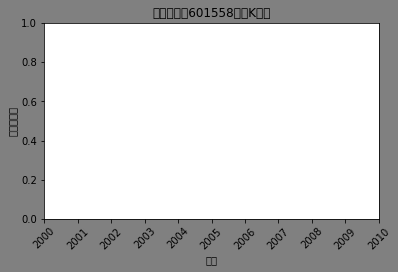

In [47]:
# 创建一个子图 
fig, ax = plt.subplots(facecolor=(0.5, 0.5, 0.5))
fig.subplots_adjust(bottom=0.2)
# 设置X轴刻度为日期时间
ax.xaxis_date()
# X轴刻度文字倾斜45度
plt.xticks(rotation=45)
plt.title("股票代码：601558两年K线图")
plt.xlabel("时间")
plt.ylabel("股价（元）")
candlestick_ohlc(ax,quotes,width=1.2,colorup='r',colordown='green', alpha=1.0)
plt.grid(True)

This problem:

    c:\users\hcche\appdata\local\programs\python\python36\lib\site-packages\mpl_finance.py in _candlestick(ax, quotes, width, colorup, colordown, alpha, ochl)
        281             t, open, close, high, low = q[:5]
        282         else:
    --> 283             t, open, high, low, close = q[:5]
        284 
        285         if close >= open:
    
    ValueError: not enough values to unpack (expected 5, got 4)

Has a solution 

    https://stackoverflow.com/questions/49250925/issue-when-trying-to-create-candlestick-chart-using-candlestick-ohlc



In [ ]:
import datetime
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [ ]:
ohlc = [[1502928000000, 4261.48, 4485.39, 4200.74, 4285.08, 795.150377], 
        [1503014400000, 4285.08, 4371.52, 3938.77, 4108.37, 1199.888264], 
        [1503100800000, 4108.37, 4184.69, 3850.0, 4139.98, 381.309763], 
        [1503187200000, 4120.98, 4211.08, 4032.62, 4086.29, 467.083022], 
        [1503273600000, 4069.13, 4119.62, 3911.79, 4016.0, 691.74306], 
        [1503360000000, 4016.0, 4104.82, 3400.0, 4040.0, 966.684858], 
        [1503446400000, 4040.0, 4265.8, 4013.89, 4114.01, 1001.136565], 
        [1503532800000, 4147.0, 4371.68, 4085.01, 4316.01, 787.418753]]

In [ ]:
for row in ohlc:
    row[0] = mdates.date2num(datetime.datetime.fromtimestamp(row[0]/1000.))

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
candlestick_ohlc(ax1,ohlc,width=0.2)

date_fmt = '%d-%m-%y %H:%M:%S'
fig.subplots_adjust(bottom=0.2)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
%f __main__ :> ohlc type . cr
np.array(ohlc).shape    
for row in ohlc:
    # row[0] = mdates.date2num(datetime.datetime.fromtimestamp(row[0]/1000.))
    peforth.push(row).ok()
    break
    
    

In [42]:
row = [1502928000000, 4261.48, 4485.39, 4200.74, 4285.08, 795.150377]
mdates.date2num(datetime.datetime.fromtimestamp(row[0]/1000.))

736558.3333333334

In [ ]:
datetime.datetime.fromtimestamp(row[0]/1000)

In [ ]:
mdates.date2num(datetime.datetime.fromtimestamp(row[0]/1000))

In [ ]:
quotes.index.to_pydatetime()

In [ ]:
mdates.date2num(quotes.index.to_pydatetime())

In [39]:
quotes.date

0       1995-01-03
1       1995-01-04
2       1995-01-05
3       1995-01-06
4       1995-01-09
5       1995-01-10
6       1995-01-11
7       1995-01-12
8       1995-01-13
9       1995-01-16
10      1995-01-17
11      1995-01-18
12      1995-01-19
13      1995-01-20
14      1995-01-23
15      1995-01-24
16      1995-01-25
17      1995-01-26
18      1995-01-27
19      1995-01-30
20      1995-01-31
21      1995-02-01
22      1995-02-02
23      1995-02-03
24      1995-02-06
25      1995-02-07
26      1995-02-08
27      1995-02-09
28      1995-02-10
29      1995-02-13
           ...    
2305    2004-02-27
2306    2004-03-01
2307    2004-03-02
2308    2004-03-03
2309    2004-03-04
2310    2004-03-05
2311    2004-03-08
2312    2004-03-09
2313    2004-03-10
2314    2004-03-11
2315    2004-03-12
2316    2004-03-15
2317    2004-03-16
2318    2004-03-17
2319    2004-03-18
2320    2004-03-19
2321    2004-03-22
2322    2004-03-23
2323    2004-03-24
2324    2004-03-25
2325    2004-03-26
2326    2004

In [37]:
# datetime.datetime.strftime('1999.1.1')
# https://stackoverflow.com/questions/466345/converting-string-into-datetime
datetime.datetime.strptime('2005-03-01    1:33PM', '%Y-%m-%d %I:%M%p')

datetime.datetime(2005, 3, 1, 13, 33)

In [38]:
datetime.datetime.strptime('2005-03-01', '%Y-%m-%d')

datetime.datetime(2005, 3, 1, 0, 0)

In [43]:
[mdates.date2num(datetime.datetime.strptime(d, '%Y-%m-%d')) for d in quotes.date]

[728296.0,
 728297.0,
 728298.0,
 728299.0,
 728302.0,
 728303.0,
 728304.0,
 728305.0,
 728306.0,
 728309.0,
 728310.0,
 728311.0,
 728312.0,
 728313.0,
 728316.0,
 728317.0,
 728318.0,
 728319.0,
 728320.0,
 728323.0,
 728324.0,
 728325.0,
 728326.0,
 728327.0,
 728330.0,
 728331.0,
 728332.0,
 728333.0,
 728334.0,
 728337.0,
 728338.0,
 728339.0,
 728340.0,
 728341.0,
 728345.0,
 728346.0,
 728347.0,
 728348.0,
 728351.0,
 728352.0,
 728353.0,
 728354.0,
 728355.0,
 728358.0,
 728359.0,
 728360.0,
 728361.0,
 728362.0,
 728365.0,
 728366.0,
 728367.0,
 728368.0,
 728369.0,
 728372.0,
 728373.0,
 728374.0,
 728375.0,
 728376.0,
 728379.0,
 728380.0,
 728381.0,
 728382.0,
 728383.0,
 728386.0,
 728387.0,
 728388.0,
 728389.0,
 728390.0,
 728393.0,
 728394.0,
 728395.0,
 728396.0,
 728400.0,
 728401.0,
 728402.0,
 728403.0,
 728404.0,
 728407.0,
 728408.0,
 728409.0,
 728410.0,
 728411.0,
 728414.0,
 728415.0,
 728416.0,
 728417.0,
 728418.0,
 728421.0,
 728422.0,
 728423.0,
 728424.0,

In [44]:
quotes.date = [mdates.date2num(datetime.datetime.strptime(d, '%Y-%m-%d')) for d in quotes.date]

In [48]:
dict(quotes)

{'date': 0       728296.0
 1       728297.0
 2       728298.0
 3       728299.0
 4       728302.0
 5       728303.0
 6       728304.0
 7       728305.0
 8       728306.0
 9       728309.0
 10      728310.0
 11      728311.0
 12      728312.0
 13      728313.0
 14      728316.0
 15      728317.0
 16      728318.0
 17      728319.0
 18      728320.0
 19      728323.0
 20      728324.0
 21      728325.0
 22      728326.0
 23      728327.0
 24      728330.0
 25      728331.0
 26      728332.0
 27      728333.0
 28      728334.0
 29      728337.0
           ...   
 2305    731638.0
 2306    731641.0
 2307    731642.0
 2308    731643.0
 2309    731644.0
 2310    731645.0
 2311    731648.0
 2312    731649.0
 2313    731650.0
 2314    731651.0
 2315    731652.0
 2316    731655.0
 2317    731656.0
 2318    731657.0
 2319    731658.0
 2320    731659.0
 2321    731662.0
 2322    731663.0
 2323    731664.0
 2324    731665.0
 2325    731666.0
 2326    731669.0
 2327    731670.0
 2328    731671.0
 2